In [53]:
# Nonlinearity

<Axes: xlabel='palmer z-index', ylabel='precipitation'>

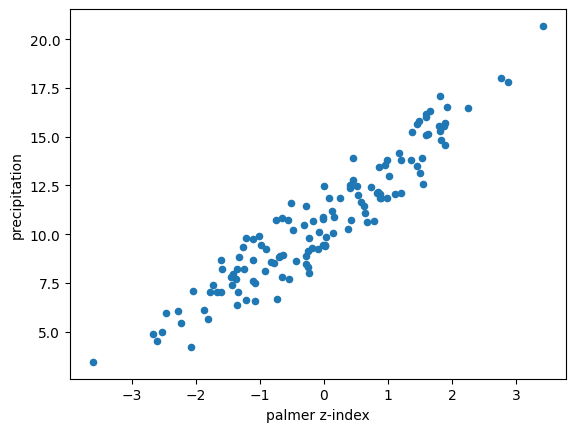

In [54]:
import pandas as pd

data = pd.read_csv("NJ_Precipitation.csv", index_col=0)
data.ffill()

data.plot.scatter("palmer z-index", "precipitation")

In [55]:
data.corr()

,precipitation,rank,anomaly,palmer z-index
precipitation,1.000000,-0.980744,1.000000,0.945916
rank,-0.980744,1.000000,-0.980744,-0.932261
anomaly,1.000000,-0.980744,1.000000,0.945916
palmer z-index,0.945916,-0.932261,0.945916,1.000000


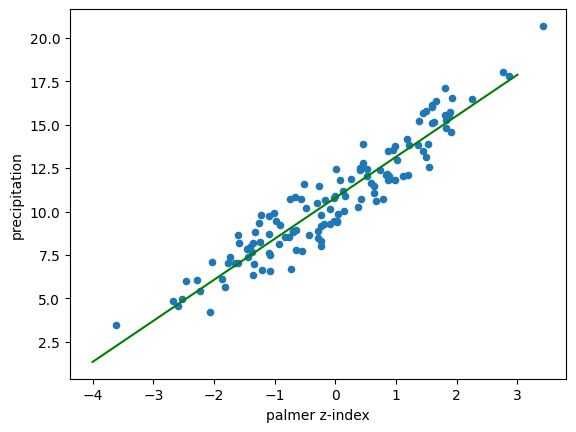

In [56]:
import matplotlib.pyplot as plt

data.plot.scatter("palmer z-index", "precipitation")

prediction = lambda x, w1=2.36, b=10.79: x * w1 + b

plt.plot([-4, 3], [prediction(-4),prediction(3)], 'green')

In [57]:
import numpy as np

def mse(actual, predicted):
    # Calculate mean squared error
    return np.mean((actual - predicted) ** 2)

# Error with the weight of 2.36 and the bias of 10.79
print(mse(data["precipitation"], prediction(data["palmer z-index"])))

# Error with a small shift in our weight, to 2.4, and in our bias, to 10.8
print(mse(data["precipitation"], prediction(data["palmer z-index"], 2.4, 10.8)))

1.1492040861538464
1.1519995384615382


In [58]:
# Cut our Palmer z-index range into 25 bins
palm_bins = pd.cut(data["palmer z-index"], 15)

In [59]:
palm_bins

Date
September-November 1895    (-1.733, -1.263]
September-November 1896     (-0.325, 0.145]
September-November 1897     (-0.325, 0.145]
September-November 1898      (1.083, 1.553]
September-November 1899     (-0.325, 0.145]
                                 ...       
September-November 2020      (0.614, 1.083]
September-November 2021      (0.614, 1.083]
September-November 2022     (-0.325, 0.145]
September-November 2023      (0.145, 0.614]
September-November 2024    (-3.617, -3.141]
Name: palmer z-index, Length: 130, dtype: category
Categories (15, interval[float64, right]): [(-3.617, -3.141] < (-3.141, -2.671] < (-2.671, -2.202] < (-2.202, -1.733] ... (1.553, 2.022] < (2.022, 2.491] < (2.491, 2.961] < (2.961, 3.43]]

In [60]:
binned_palm = data["palmer z-index"].groupby(palm_bins).mean()

C:\Users\jonat\AppData\Local\Temp\ipykernel_3156\2158675799.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binned_palm = data["palmer z-index"].groupby(palm_bins).mean()


In [61]:
ratios = (data["precipitation"] - 10.79) / data ["palmer z-index"]

In [62]:
binned_ratio = ratios.groupby(palm_bins).mean()

C:\Users\jonat\AppData\Local\Temp\ipykernel_3156\4189157633.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binned_ratio = ratios.groupby(palm_bins).mean()


In [63]:
binned_ratio

palmer z-index
(-3.617, -3.141]    2.033241
(-3.141, -2.671]         NaN
(-2.671, -2.202]    2.225667
(-2.202, -1.733]    2.482585
(-1.733, -1.263]    2.126624
(-1.263, -0.794]    2.119285
(-0.794, -0.325]    2.453308
(-0.325, 0.145]     7.658427
(0.145, 0.614]      2.215911
(0.614, 1.083]      1.505948
(1.083, 1.553]      2.196457
(1.553, 2.022]      2.787391
(2.022, 2.491]      2.524444
(2.491, 2.961]      2.526246
(2.961, 3.43]       2.883382
dtype: float64

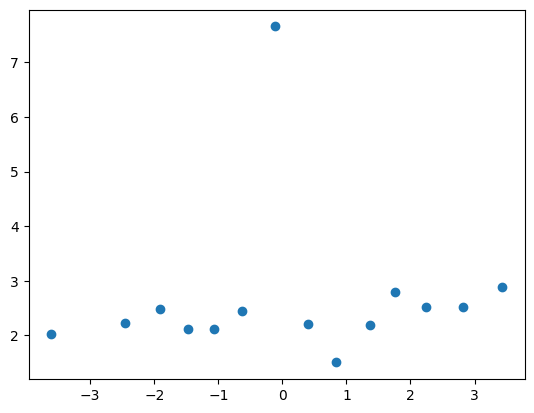

In [64]:
plt.scatter(binned_palm, binned_ratio)

In [65]:
# Neural Networks do 3 keys things: 

# 1. They add in a nonlinear transformation on top of a linear transformation
# 2. They have multiple layers, which can capture interactions between features
# 3. They have multiple hidden units, which each have slightly different linear and nonlinear transformations

In [66]:
# Activation Functions